# Importing Necessary Libraries for Analysis


In [1]:
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting


### Loading the Data set

In [2]:
df = pd.read_csv("data.csv")  


### Checking the Data Structure

In [3]:
# Display first 5 rows
df.head()


,clientsid,Gender,CountyOfBirth,Age,EntryPoint,ReferredOrTransferredFrom,InitialVisitDate,BP,Weight_,Height,SignOfSti,Lmp,Cluster,FacilityType,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
0,10269-07-1/18,M,Kisii,38,Referred,VCT Site,2018-03-14,113/82,68.0,172.0,No,1900-01-01,Nairobi,Public,1,1,1,1,1,0
1,10269-07-2/18,F,Meru,44,Referred,VCT Site,2018-04-11,120/84,102.0,168.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
2,10269-07-3/18,M,Kiambu,40,Referred,Outreach,2018-04-04,113/84,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
3,10269-07-4/18,M,Bungoma,24,Referred,VCT Site,2018-04-11,000/00,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,0,0,1
4,10269-07-5/18,F,Kiambu,31,Referred,VCT Site,2018-05-13,000/00,75.5,759.5,No,2018-04-01,Nairobi,Public,1,1,0,0,0,1


In [4]:
# Display column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   clientsid                  22131 non-null  object 
 1   Gender                     22131 non-null  object 
 2   CountyOfBirth              22131 non-null  object 
 3   Age                        22131 non-null  int64  
 4   EntryPoint                 22131 non-null  object 
 5   ReferredOrTransferredFrom  22131 non-null  object 
 6   InitialVisitDate           22131 non-null  object 
 7   BP                         21824 non-null  object 
 8   Weight_                    22014 non-null  float64
 9   Height                     22014 non-null  float64
 10  SignOfSti                  22014 non-null  object 
 11  Lmp                        22014 non-null  object 
 12  Cluster                    22131 non-null  object 
 13  FacilityType               22131 non-null  obj

In [5]:
# Summary statistics for numerical columns
df.describe()


,Age,Weight_,Height,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
count,22131.000000,22014.000000,2.201400e+04,22131.0,22131.000000,22131.000000,22131.000000,22131.000000,22131.000000
mean,27.284804,76.109112,1.907873e+02,1.0,0.476210,0.275857,0.178844,0.065926,0.521034
std,10.644699,1201.812775,1.063263e+04,0.0,0.499445,0.446955,0.383230,0.248158,0.499569
min,15.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,50.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,60.000000,1.560000e+02,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31.000000,68.000000,1.640000e+02,1.0,1.000000,1.000000,0.000000,0.000000,1.000000
max,544.000000,79174.000000,1.560000e+06,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling Missing Values

#### Cheking for missing values

In [6]:
df.isnull().sum()


clientsid                      0
Gender                         0
CountyOfBirth                  0
Age                            0
EntryPoint                     0
ReferredOrTransferredFrom      0
InitialVisitDate               0
BP                           307
Weight_                      117
Height                       117
SignOfSti                    117
Lmp                          117
Cluster                        0
FacilityType                   0
Received_DP                    0
Refill1month                   0
Refill2months                  0
Refill3months                  0
Refill6months                  0
received_counseling            0
dtype: int64

#### Dropping missing values

In [7]:

df.dropna(inplace=True)  # Drop rows with missing values


In [8]:
#confirming the missing values have been dropped
df.isnull().sum()


clientsid                    0
Gender                       0
CountyOfBirth                0
Age                          0
EntryPoint                   0
ReferredOrTransferredFrom    0
InitialVisitDate             0
BP                           0
Weight_                      0
Height                       0
SignOfSti                    0
Lmp                          0
Cluster                      0
FacilityType                 0
Received_DP                  0
Refill1month                 0
Refill2months                0
Refill3months                0
Refill6months                0
received_counseling          0
dtype: int64

### Handling Duplicates

#### cheking for Duplicates

In [9]:
df.duplicated().sum()  # Count duplicates



0

### Handling Outliers

In [10]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to relevant numeric columns
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Height')
df = remove_outliers(df, 'Weight_')



#### Adding age groups to the dataframe

In [11]:
# age bins
age_bins = [15, 25, 35, 45]
age_labels = ['15-24', '25-34', '35-44']

# Adding an age group column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print(df[['Age', 'AgeGroup']].head())

    Age AgeGroup
0    38    35-44
8    42    35-44
9    31    25-34
11   20    15-24
12   33    25-34


### Analysis How Counselling has impacted the Continuation Uptake of the DP pill

#### All patients

Number of patients at each level of DP uptake
Received_DP      17101
Refill1month      8218
Refill2months     4742
Refill3months     3100
Refill6months     1145
dtype: int64
Average refill rates for all patients:
Received_DP      1.000000
Refill1month     0.480557
Refill2months    0.277294
Refill3months    0.181276
Refill6months    0.066955
dtype: float64


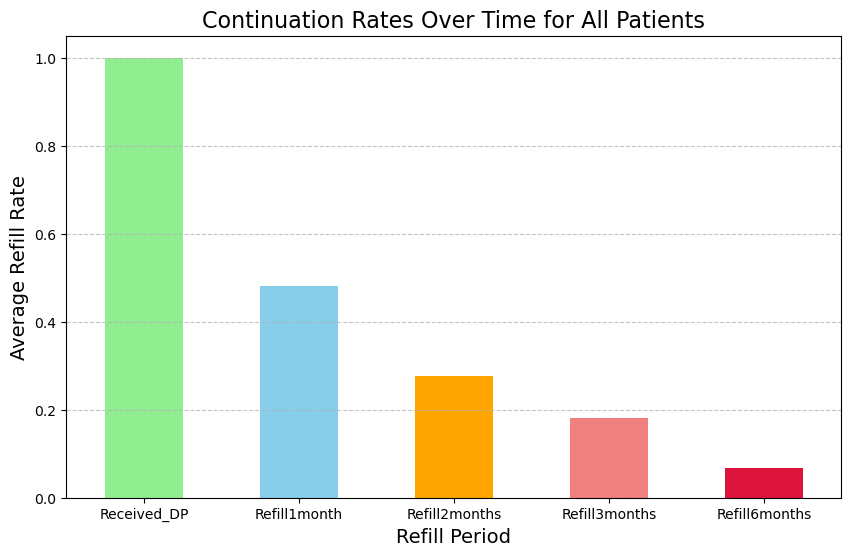

In [12]:
# columns in consideration
columns_to_average = ['Received_DP','Refill1month', 'Refill2months', 'Refill3months', 'Refill6months']

# Total number of patients at each refill stage
All_Patients = df[columns_to_average].sum()

# Average refill rates for all patients 
Average_Refill_Rates = df[columns_to_average].mean()


print('Number of patients at each level of DP uptake')
print(All_Patients)
print("Average refill rates for all patients:")
print(Average_Refill_Rates)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for All Patients', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Patients who received counselling


Number of patients who received counselling at each level of DP uptake
Received_DP      8918
Refill1month     4726
Refill2months    2967
Refill3months    2107
Refill6months    1033
dtype: int64
Average refill rates for patients who received counselling:
Received_DP      1.000000
Refill1month     0.529939
Refill2months    0.332698
Refill3months    0.236264
Refill6months    0.115833
dtype: float64


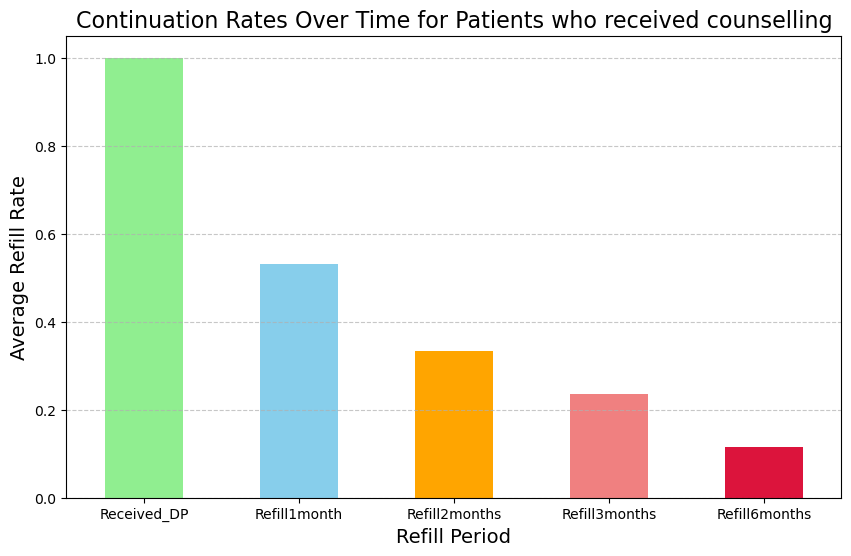

In [13]:
# Filtering the data set only to have those who received counselling
Received_df = df[df['received_counseling'] == 1]

# Total number of patients who received counselling at each refill stage
Patients_R = Received_df[columns_to_average].sum()

# Average refill rates for patients who received counselling
Average_Refill_Rates_R = Received_df[columns_to_average].mean()

print('Number of patients who received counselling at each level of DP uptake')
print(Patients_R)
print("Average refill rates for patients who received counselling:")
print(Average_Refill_Rates_R)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_R.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for Patients who received counselling', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Patients who never received counselling

Number of patients who never received counselling at each level of DP uptake
Received_DP      8183
Refill1month     3492
Refill2months    1775
Refill3months     993
Refill6months     112
dtype: int64
Average refill rates for patients who never received counselling:
Received_DP      1.000000
Refill1month     0.426738
Refill2months    0.216913
Refill3months    0.121349
Refill6months    0.013687
dtype: float64


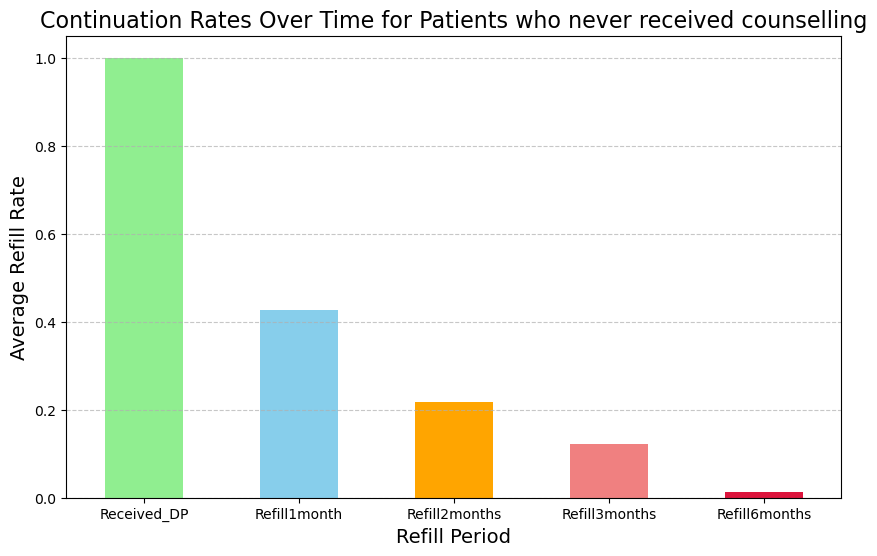

In [14]:
# Filtering the data set only to have patients who never received counselling
Never_Received_df = df[df['received_counseling'] == 0]

# Total number of patients who never received counselling at each refill stage
Patients_NR = Never_Received_df[columns_to_average].sum()

# Average refill rates for patients who never received counselling
Average_Refill_Rates_NR = Never_Received_df[columns_to_average].mean()

print('Number of patients who never received counselling at each level of DP uptake')
print(Patients_NR)
print("Average refill rates for patients who never received counselling:")
print(Average_Refill_Rates_NR)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_NR.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for Patients who never received counselling', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis How Gender has impacted the Continuation Uptake of the DP pill
#### Males

Average refill rates for male patients:
Received_DP      1.000000
Refill1month     0.484529
Refill2months    0.278937
Refill3months    0.179234
Refill6months    0.065093
dtype: float64
Received_DP      4363
Refill1month     2114
Refill2months    1217
Refill3months     782
Refill6months     284
dtype: int64


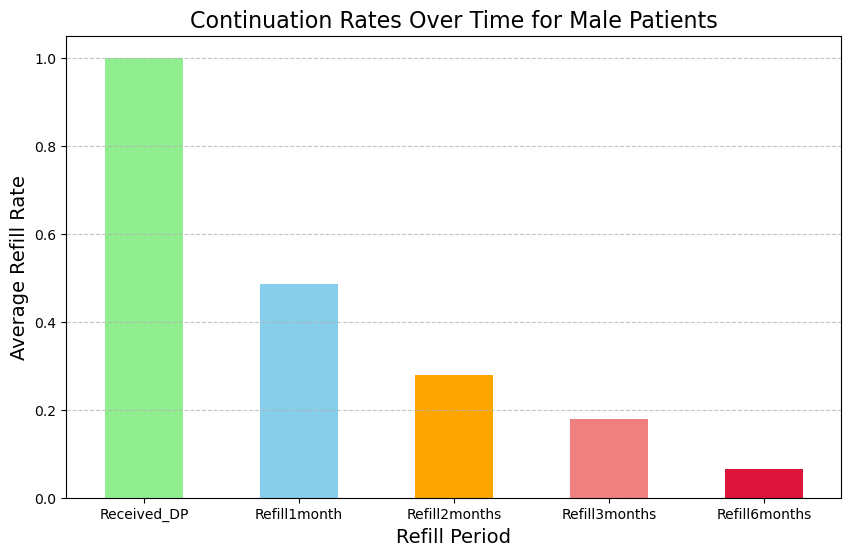

In [15]:
# Filtering the data set only to have those who received counselling
males_df = df[df['Gender'] == 'M']

# Total number of patients at each refill stage
Patients_M = males_df[columns_to_average].sum()

# Average refill rates for patients who received counselling
Average_Refill_Rates_M = males_df[columns_to_average].mean()

print("Average refill rates for male patients:")
print(Average_Refill_Rates_M)
print(Patients_M)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_M.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for Male Patients', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Females

Average refill rates for female patients:
Received_DP      1.000000
Refill1month     0.479234
Refill2months    0.276753
Refill3months    0.181989
Refill6months    0.067598
dtype: float64
Received_DP      12737
Refill1month      6104
Refill2months     3525
Refill3months     2318
Refill6months      861
dtype: int64


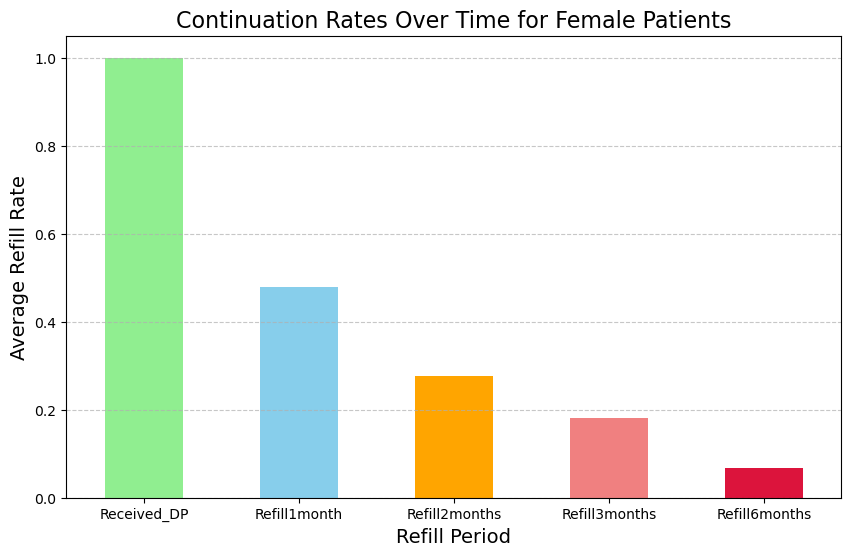

In [16]:
# Filtering the data set only to have those who received counselling
females_df = df[df['Gender'] == 'F']

# Total number of patients at each refill stage
Patients_F = females_df[columns_to_average].sum()

# Average refill rates for patients who received counselling
Average_Refill_Rates_F = females_df[columns_to_average].mean()

print("Average refill rates for female patients:")
print(Average_Refill_Rates_F)
print(Patients_F)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_F.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for Female Patients', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
max_age = df['Age'].max()
min_age = df['Age'].min()


In [18]:
print(max_age)
print(min_age)

44
15


### Analysis How Gender has impacted the Continuation Uptake of the DP pill
#### Age group 15-24

Average refill rates for age group 15-24:
Received_DP      1.000000
Refill1month     0.430773
Refill2months    0.227984
Refill3months    0.135152
Refill6months    0.040974
dtype: float64
Received_DP      8176
Refill1month     3522
Refill2months    1864
Refill3months    1105
Refill6months     335
dtype: int64


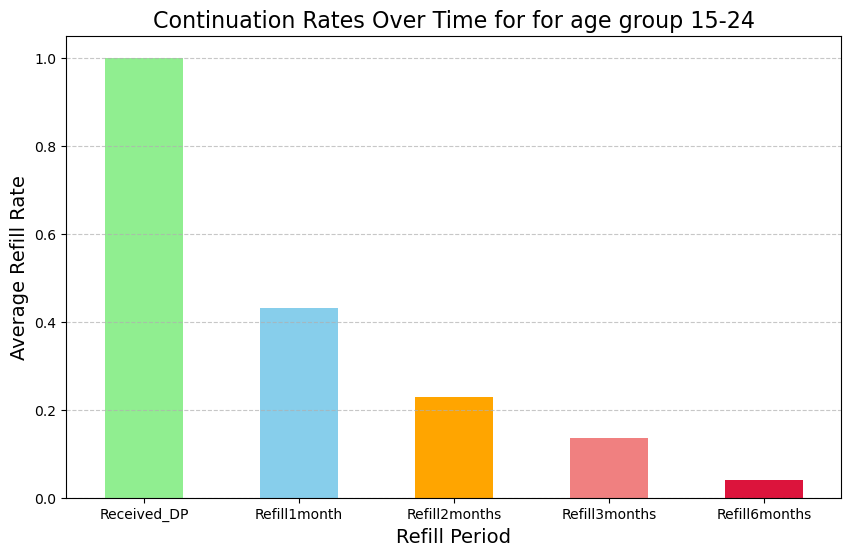

In [19]:
# Filtering the data set only to have Age Group 15-24
Age_15_24_df = df[df['AgeGroup'] == '15-24']

# Total number of patients at each refill stage
Patients_Age_15_24 = Age_15_24_df[columns_to_average].sum()

# Average refill rates for Age Group 15-24
Average_Refill_Rates_Age_15_24 = Age_15_24_df[columns_to_average].mean()

print("Average refill rates for age group 15-24:")
print(Average_Refill_Rates_Age_15_24)
print(Patients_Age_15_24)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_Age_15_24.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for for age group 15-24', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Age group 25-34

Average refill rates for age group 25-34:
Received_DP      1.000000
Refill1month     0.520999
Refill2months    0.310146
Refill3months    0.210709
Refill6months    0.081974
dtype: float64
Received_DP      6929
Refill1month     3610
Refill2months    2149
Refill3months    1460
Refill6months     568
dtype: int64


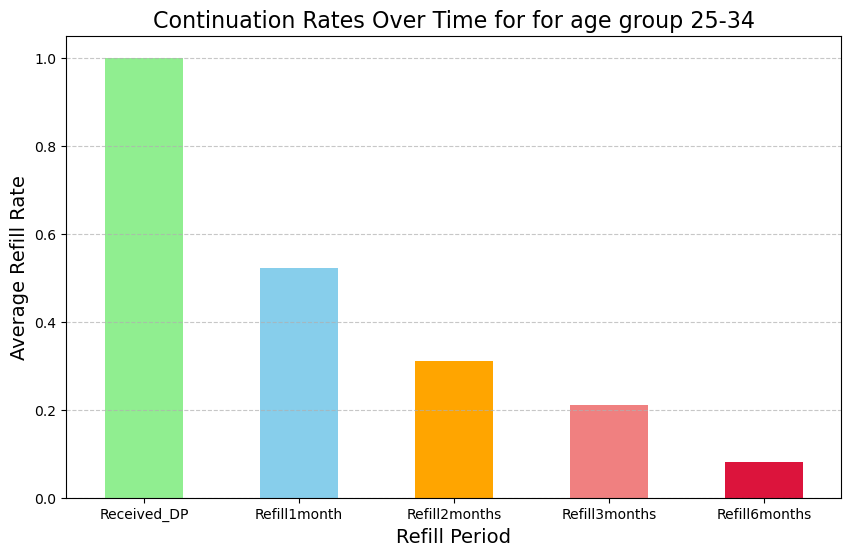

In [20]:
# Filtering the data set only to have Age Group 25-34
Age_25_34_df = df[df['AgeGroup'] == '25-34']

# Total number of patients at each refill stage
Patients_Age_25_34 = Age_25_34_df[columns_to_average].sum()

# Average refill rates for Age Group 25-34
Average_Refill_Rates_Age_25_34 = Age_25_34_df[columns_to_average].mean()

print("Average refill rates for age group 25-34:")
print(Average_Refill_Rates_Age_25_34)
print(Patients_Age_25_34)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_Age_25_34.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for for age group 25-34', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Age group 35-44

Average refill rates for age group 25-34:
Received_DP      1.000000
Refill1month     0.544088
Refill2months    0.365230
Refill3months    0.268036
Refill6months    0.121242
dtype: float64
Received_DP      1996
Refill1month     1086
Refill2months     729
Refill3months     535
Refill6months     242
dtype: int64


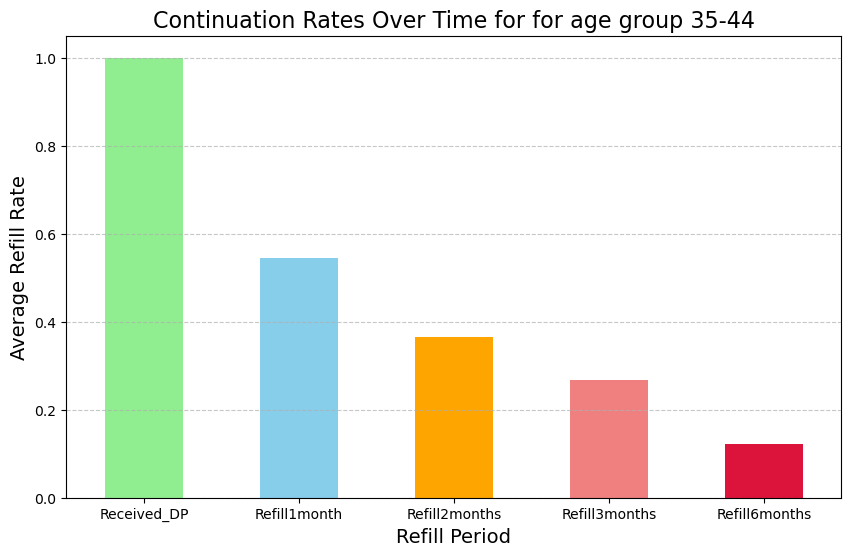

In [21]:
# Filtering the data set only to have Age Group 35-44
Age_35_44_df = df[df['AgeGroup'] == '35-44']

# Total number of patients at each refill stage
Patients_Age_35_44 = Age_35_44_df[columns_to_average].sum()

# Average refill rates for Age Group 35-44
Average_Refill_Rates_Age_35_44 = Age_35_44_df[columns_to_average].mean()

print("Average refill rates for age group 25-34:")
print(Average_Refill_Rates_Age_35_44)
print(Patients_Age_35_44)

# plotting a Bar graph to give a better understanding of continuation rates
plt.figure(figsize=(10, 6))
Average_Refill_Rates_Age_35_44.plot(kind='bar', color=['lightgreen','skyblue', 'orange', 'lightcoral', 'crimson'])
plt.title('Continuation Rates Over Time for for age group 35-44', fontsize=16)
plt.xlabel('Refill Period', fontsize=14)
plt.ylabel('Average Refill Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Summary statistics of the data

* 100% of the patients received Dp intilially, Only 48.1 % returned for a 1-month refill. Dp continuation drops further at 2 months(27.7%), 3 months(18.1%) and 6 months(6.7%). This indicates a sharp decrease in adherence which is a real concern.
* 52% of patients received counselling, potentially influencing adherence.

#### What the graphs are telling us about continuation rates and how the rates differ by key variables

The graphs show a sharp decline in DP pill continuation rates over time. Initially, 100% of patients received the DP pill, but only about 48.1% returned for the 1-month refill. This trend continues downward, with 27.7% at 2 months, 18.1% at 3 months, and just 6.7% at the 6-month refill. This significant drop-off indicates that despite the pills being free and accessible, patients are not consistently continuing with the regimen over time.

When analyzing key variables, the data reveals that patients who received counselling have notably higher continuation rates compared to those who did not receive counselling. Age also plays a role: the 35-44 age group shows the highest continuation rates, while the 15-24 group has the lowest. Gender differences are present, with females more likely to continue than males. These insights suggest that counselling and certain demographic factors significantly impact adherence, highlighting areas where targeted interventions could improve continuation rates.

#### One intervention/improvement to the problem JHG is facing, referencing the data
Enhance counselling services to improve DP pill continuation rates. The data shows that patients who received counselling had significantly higher adherence compared to those who didn't. This suggests that counselling effectively addresses behavioural barriers such as misconceptions, stigma, and lack of understanding about the importance of daily adherence, which are not resolved by free and accessible medication alone.


#### One intervention/improvement to the problem JHG is facing, referencing relevant literature on the topic
Relevant literature supports this approach. Studies in HIV prevention have found that personalized counselling improves medication adherence by increasing patients' knowledge, addressing their concerns, and providing support. By integrating counselling as a standard part of the DP pill program, JHG can tackle the underlying behavioural issues contributing to low uptake, leading to improved continuation rates and better health outcomes in the communities they serve.
#### a better way (if at all) to assess the effectiveness of the intervention?
By adopting a more rigorous evaluation approach, JHG can more accurately assess the effectiveness of the enhanced counselling intervention. A Randomized Controlled Trial (RCT) provides the strongest evidence of causality, but if not feasible, quasi-experimental designs like Difference-in-Differences or Propensity Score Matching offer valuable alternatives. Implementing these methods will enable JHG to determine whether the intervention directly caused improvements in DP uptake and adherence, guiding future program decisions and resource allocation.

